In [1]:
%matplotlib inline  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#%%time

# Load S&P 500 dataset over a 5 year period from Yahoo Finance
df = pd.read_csv('SP500.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-05-05,1879.449951,1885.510010,1866.770020,1884.660034,1884.660034,2733730000
1,2014-05-06,1883.689941,1883.689941,1867.719971,1867.719971,1867.719971,3327260000
2,2014-05-07,1868.530029,1878.829956,1859.790039,1878.209961,1878.209961,3632950000
3,2014-05-08,1877.390015,1889.069946,1870.050049,1875.630005,1875.630005,3393420000
4,2014-05-09,1875.270020,1878.569946,1867.020020,1878.479980,1878.479980,3025020000


## A. Data Wrangling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
Date         1259 non-null object
Open         1259 non-null float64
High         1259 non-null float64
Low          1259 non-null float64
Close        1259 non-null float64
Adj Close    1259 non-null float64
Volume       1259 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [4]:
# Check for NaN value

df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### No NaN value was found in this dataset. 


#### Convert 'Date' to datetime object
#### Add day, month, year to the dataframe



In [5]:
df.Date = pd.to_datetime(df.Date) #convert 'date' to DateTime object
df['day'], df['month'], df['year'] = df.Date.dt.weekday_name, df.Date.dt.month, df.Date.dt.year
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,2014-05-05,1879.449951,1885.510010,1866.770020,1884.660034,1884.660034,2733730000,Monday,5,2014
1,2014-05-06,1883.689941,1883.689941,1867.719971,1867.719971,1867.719971,3327260000,Tuesday,5,2014
2,2014-05-07,1868.530029,1878.829956,1859.790039,1878.209961,1878.209961,3632950000,Wednesday,5,2014
3,2014-05-08,1877.390015,1889.069946,1870.050049,1875.630005,1875.630005,3393420000,Thursday,5,2014
4,2014-05-09,1875.270020,1878.569946,1867.020020,1878.479980,1878.479980,3025020000,Friday,5,2014
5,2014-05-12,1880.030029,1897.130005,1880.030029,1896.650024,1896.650024,3005740000,Monday,5,2014
6,2014-05-13,1896.750000,1902.170044,1896.060059,1897.449951,1897.449951,2915680000,Tuesday,5,2014
7,2014-05-14,1897.130005,1897.130005,1885.770020,1888.530029,1888.530029,2822060000,Wednesday,5,2014
8,2014-05-15,1888.160034,1888.160034,1862.359985,1870.849976,1870.849976,3552640000,Thursday,5,2014
9,2014-05-16,1871.189941,1878.280029,1864.819946,1877.859985,1877.859985,3173650000,Friday,5,2014


#### Data Visualization

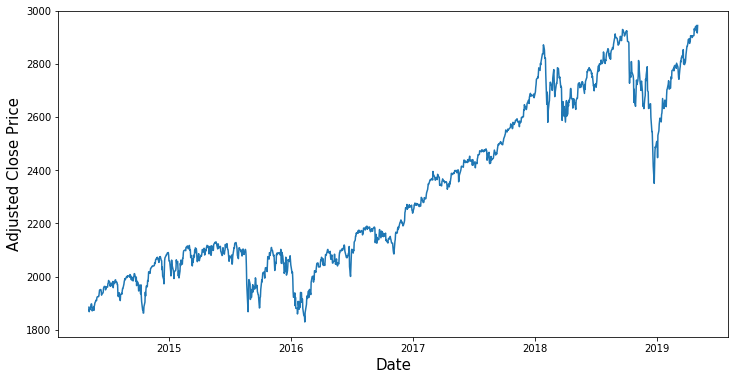

In [6]:
plt.figure(figsize=(12,6))

plt.plot(df['Date'],df['Adj Close'])

plt.ylabel('Adjusted Close Price', fontsize=15)
plt.xlabel('Date', fontsize=15)

plt.show()
plt.close()

## B. Apply Data Storytelling


### Question 1. Is there any effect of different times throughout the year on stock price? How do stock price & volume vary throughout a year?



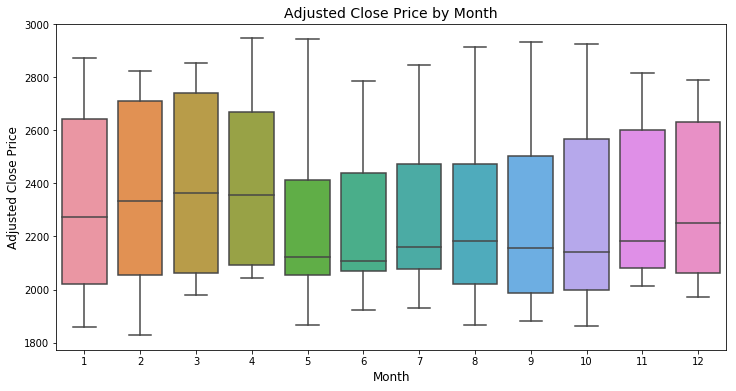

In [7]:
# Plot Adjusted Close Price by Month to detect Seasonality Effect

plt.figure(figsize=(12,6))
sns.boxplot(x = 'month', y = 'Adj Close', data = df)
plt.ylabel('Adjusted Close Price', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Adjusted Close Price by Month', fontsize = 14)
plt.show()
plt.close()

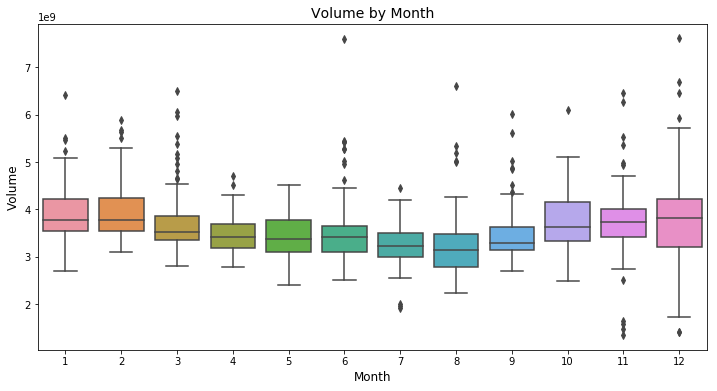

In [8]:
# Plot Volume by Month

plt.figure(figsize=(12,6))
sns.boxplot(x = 'month', y = 'Volume', data = df)
plt.ylabel('Volume', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Volume by Month', fontsize = 14)
plt.show()
plt.close()

There are big changes in Price & Volume throughout a year. Let's look at some line plots to study the trend

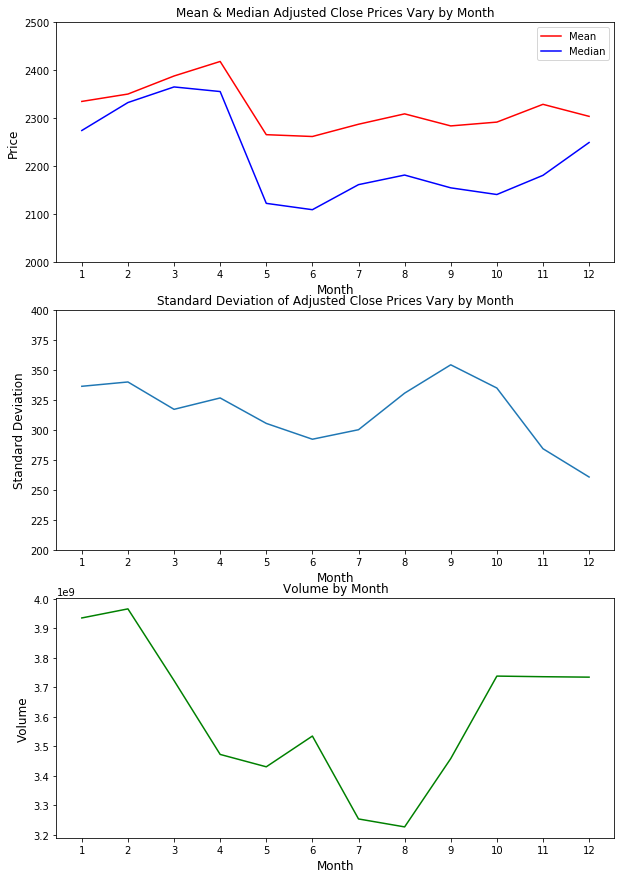

In [9]:
plt.figure(figsize=(10,15))

plt.figure(1)

# Plot Mean and Median by Month
plt.subplot(311)
plt.plot(df.groupby('month')[['Adj Close']].mean(),'red')
plt.plot(df.groupby('month')[['Adj Close']].median(),'blue')

plt.title('Mean & Median Adjusted Close Prices Vary by Month')
plt.xlabel('Month',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.legend(['Mean','Median'])

#plt.axis([1, 12, 2000, 2500])
plt.xticks(np.arange(1, 12.1, 1.0))
plt.yticks(np.arange(2000,2600,100))

# Plot standard deviation by month
plt.subplot(312)
plt.plot(df.groupby('month')[['Adj Close']].std())

plt.title('Standard Deviation of Adjusted Close Prices Vary by Month')
plt.xlabel('Month',fontsize=12)
plt.ylabel('Standard Deviation',fontsize=12)

plt.xticks(np.arange(1, 12.1, 1.0))
plt.yticks(np.arange(200,420,25))


# Plot Volume by month
plt.subplot(313)
plt.plot(df.groupby('month')[['Volume']].mean(),'green')

plt.title('Volume by Month')
plt.xlabel('Month',fontsize=12)
plt.ylabel('Volume',fontsize=12)

plt.xticks(np.arange(1, 12.1, 1.0))

# Show the plots
plt.show()

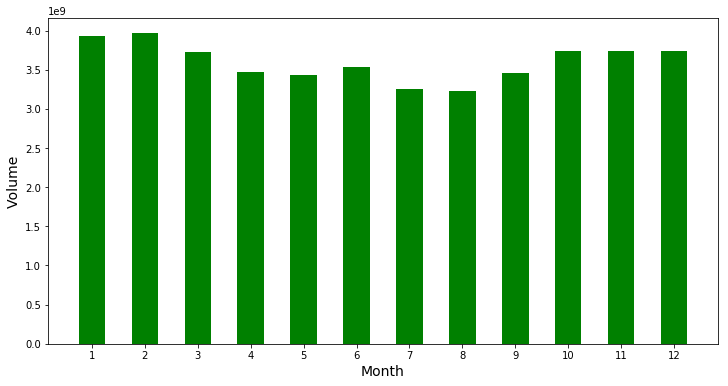

In [10]:
vol = df.groupby('month')[['Volume']].mean()

volbymonth = plt.figure(figsize=(12,6))

axis = volbymonth.add_subplot(1,1,1)
axis.bar(x=vol.index, height=vol.Volume, width = 0.5, color='green')

plt.ylabel('Volume',fontsize = 14)
plt.xlabel('Month',fontsize = 14)
plt.xticks(np.arange(1, 13, 1.0))

plt.show()


In [11]:
from scipy import stats
stats.pearsonr(df['Volume'],df['Adj Close'])

(-0.11034542244648882, 8.730196531925873e-05)

### Some insights:


* Price is highest in the first 4 months of a year.  It drops in summer, before increases again from October. 


* September is the time with highest standard deviation in stock prices. This could be due to the increase of volume , before price starts going up in October. Standard deviation starts going down from October, indicating market is getting more stable and has less fluctuation at that time.


* It is noticed that volume starts going down from March after staying high for the first 2 months, and this is followed by the drop of price in May. Volume increases rapidly in September and continues till end of the year, followed by increase of price from October. September is also the time that we observe maximum standard deviation, which could be due to this increase in volume that causes fluctuation in the market.


* These results seem to indicate that volume and price are well correlated with each other. However, Pearson Correlation Coefficient between Volume & Adjust Close Price indicates the 2 variables are reversely correlated. This could be explained as volume changes do not have immediate effects on price but a short time after that.
****



### Question 2. What is the effect of weekdays on stock price?

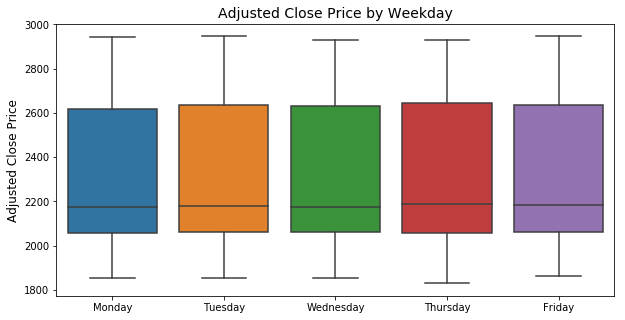

In [12]:
# Plot Adjusted Close Price vs. Weekdays

plt.figure(figsize=(10,5))
sns.boxplot(x = 'day', y = 'Adj Close', data = df)

plt.xlabel(None)
plt.ylabel('Adjusted Close Price', fontsize=12)

plt.title('Adjusted Close Price by Weekday', fontsize = 14)
plt.show()

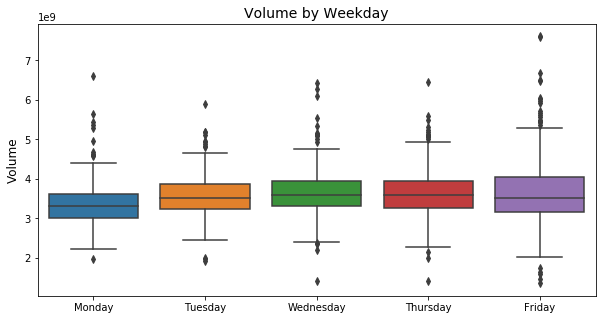

In [13]:
# Plot Volume vs. Weekdays

plt.figure(figsize=(10,5))
sns.boxplot(x = 'day', y = 'Volume', data = df)

plt.xlabel(None)
plt.ylabel('Volume', fontsize=12)

plt.title('Volume by Weekday', fontsize = 14)
plt.show()
plt.close()

#### There is not much difference in price throughout a week, however volume seems to increase from Monday to Friday. Let's look at some line plots to study the trend.

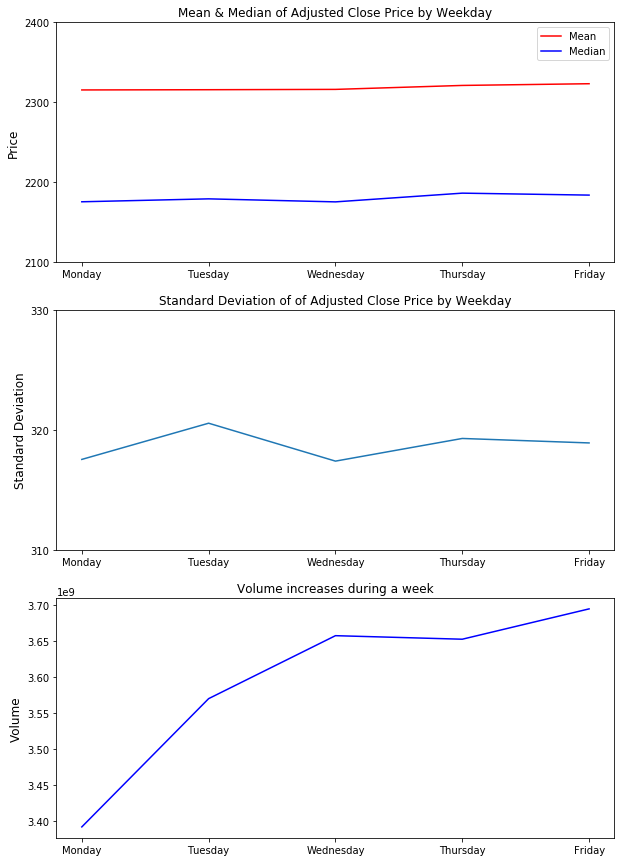

In [14]:
# Create a dictionary to map weekday

sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
sorterIndex = dict(zip(sorter,range(len(sorter))))


# Calculate mean, median, standard deviation and volume by weekday

mean_by_day = df.groupby('day')[['Adj Close']].mean()
median_by_day = df.groupby('day')[['Adj Close']].median()
std_by_day = df.groupby('day')[['Adj Close']].std()

vol_by_day = df.groupby('day')[['Volume']].mean()


# Mapping 

mean_by_day['Day_id'] = mean_by_day.index
mean_by_day['Day_id'] = mean_by_day['Day_id'].map(sorterIndex)
mean_by_day.sort_values('Day_id', inplace=True)

median_by_day['Day_id'] = median_by_day.index
median_by_day['Day_id'] = median_by_day['Day_id'].map(sorterIndex)
median_by_day.sort_values('Day_id', inplace=True)

std_by_day['Day_id'] = std_by_day.index
std_by_day['Day_id'] = std_by_day['Day_id'].map(sorterIndex)
std_by_day.sort_values('Day_id', inplace=True)

vol_by_day['Day_id'] = vol_by_day.index
vol_by_day['Day_id'] = vol_by_day['Day_id'].map(sorterIndex)
vol_by_day.sort_values('Day_id', inplace=True)


# Plotting
plt.figure(figsize=(10,15))

# Plot Mean and Median by Weekday
plt.subplot(311)
plt.plot(mean_by_day['Adj Close'],'red')
plt.plot(median_by_day['Adj Close'],'blue')

plt.title('Mean & Median of Adjusted Close Price by Weekday')
plt.ylabel('Price',fontsize=12)
plt.legend(['Mean','Median'])

plt.yticks(np.arange(2100,2401,100))


# Plot standard deviation by Weekday
plt.subplot(312)
plt.plot(std_by_day['Adj Close'])

plt.title('Standard Deviation of of Adjusted Close Price by Weekday')
plt.ylabel('Standard Deviation',fontsize=12)

plt.yticks(np.arange(310,340,10))


# Plot Volume by Weekday
plt.subplot(313)
plt.plot(vol_by_day['Volume'],'blue')

plt.title('Volume increases during a week')
plt.ylabel('Volume',fontsize=12)

# Show the plots
plt.show()

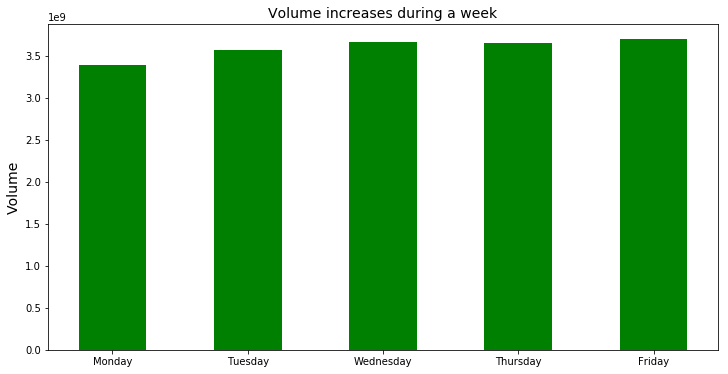

In [15]:
volbyday = plt.figure(figsize=(12,6))

axis = volbyday.add_subplot(1,1,1)
axis.bar(x=vol_by_day.index, height=vol_by_day.Volume, width = 0.5, color='green')

plt.title('Volume increases during a week',fontsize = 14)
plt.ylabel('Volume',fontsize = 14)

plt.show()



### Answer

* When averaging by weekday throughout a period of 5 years, there is no significant difference observed in prices between weekdays. This indicates that when price is in an increase or decrease cycle, it usually lasts for more than 1 week. Therefore, price averaging by weekday does not show significant difference here.

* Volume, however, shows significant change during a week. Volume is at its lowest on Monday, and keeps increasing until Friday. This represents the intensity in the market, low on Monday and high on Friday.

### Machine Learning Model: XGB

In [17]:
import xgboost as xgb
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [18]:
# Create input dataframe
df_xgb = df.copy()

# Add more features to df_xgb
df_xgb['dayofweek'] = df['Date'].dt.dayofweek
df_xgb['quarter'] = df['Date'].dt.quarter
df_xgb['dayofyear'] = df['Date'].dt.dayofyear
df_xgb['dayofmonth'] = df['Date'].dt.day
df_xgb['weekofyear'] = df['Date'].dt.weekofyear
df_xgb['day_no']=[i+1 for i in range(len(df_xgb))]
df_xgb.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,dayofweek,quarter,dayofyear,dayofmonth,weekofyear,day_no
1254,2019-04-29,2940.580078,2949.520020,2939.350098,2943.030029,2943.030029,3118780000,Monday,4,2019,0,2,119,29,18,1255
1255,2019-04-30,2937.139893,2948.219971,2924.110107,2945.830078,2945.830078,3919330000,Tuesday,4,2019,1,2,120,30,18,1256
1256,2019-05-01,2952.330078,2954.129883,2923.360107,2923.729980,2923.729980,3645850000,Wednesday,5,2019,2,2,121,1,18,1257
1257,2019-05-02,2922.159912,2931.679932,2900.500000,2917.520020,2917.520020,3778890000,Thursday,5,2019,3,2,122,2,18,1258
1258,2019-05-03,2929.209961,2947.850098,2929.209961,2945.639893,2945.639893,3338120000,Friday,5,2019,4,2,123,3,18,1259


#### Data Preparation, Model Train & Fit

1249
10


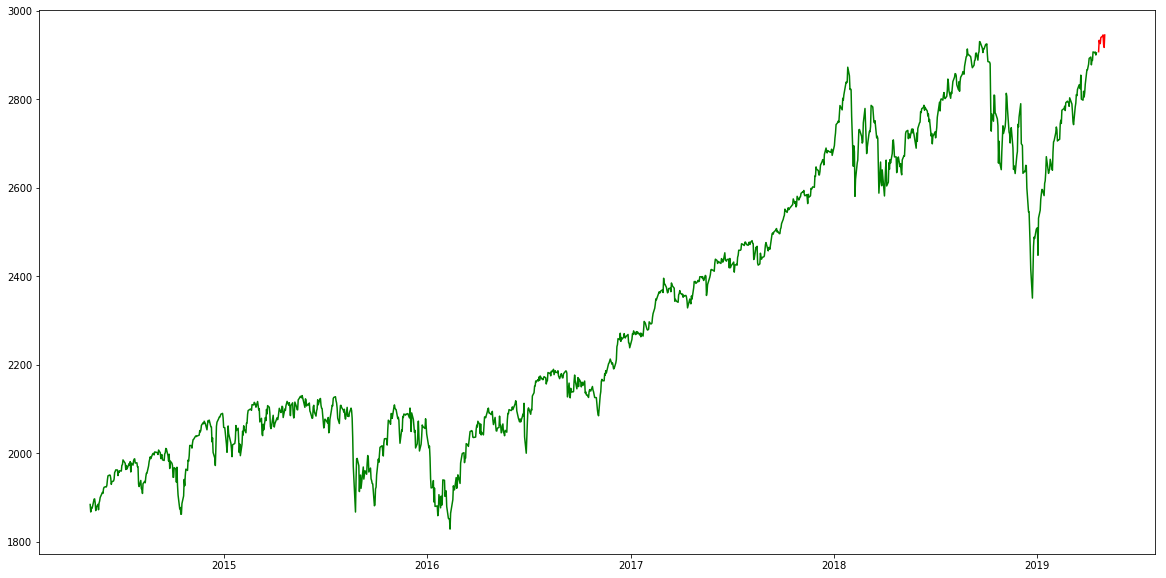

In [19]:
# Split df_xgb into train and test sets
test_size = 10
train_end = len(df_xgb) - test_size

df_xgb_train = df_xgb[:train_end]
df_xgb_test = df_xgb[train_end:]

print(len(df_xgb_train))
print(len(df_xgb_test))

plt.figure(figsize=(20,10))
plt.plot(df_xgb_train['Date'], df_xgb_train['Adj Close'], c= 'green')
plt.plot(df_xgb_test['Date'], df_xgb_test['Adj Close'], c= 'red')
plt.show()

# Create rolling average features in the training set, using data points from training only
df_xgb_train['roll_average_5'] = df_xgb_train['Adj Close'].shift(1).rolling(5).mean()
df_xgb_train['roll_average_10'] = df_xgb_train['Adj Close'].shift(1).rolling(10).mean()
df_xgb_train['roll_average_15'] = df_xgb_train['Adj Close'].shift(1).rolling(15).mean()
df_xgb_train['roll_average_20'] = df_xgb_train['Adj Close'].shift(1).rolling(20).mean()

df_xgb_train['roll_min_5'] = df_xgb_train['Adj Close'].shift(1).rolling(5).min()
df_xgb_train['roll_min_10'] = df_xgb_train['Adj Close'].shift(1).rolling(10).min()
df_xgb_train['roll_min_15'] = df_xgb_train['Adj Close'].shift(1).rolling(15).min()
df_xgb_train['roll_min_20'] = df_xgb_train['Adj Close'].shift(1).rolling(20).min()

df_xgb_train['roll_max_5'] = df_xgb_train['Adj Close'].shift(1).rolling(5).max()
df_xgb_train['roll_max_10'] = df_xgb_train['Adj Close'].shift(1).rolling(10).max()
df_xgb_train['roll_max_15'] = df_xgb_train['Adj Close'].shift(1).rolling(15).max()
df_xgb_train['roll_max_20'] = df_xgb_train['Adj Close'].shift(1).rolling(20).max()

df_xgb_train['roll_median_5'] = df_xgb_train['Adj Close'].shift(1).rolling(5).median()
df_xgb_train['roll_median_10'] = df_xgb_train['Adj Close'].shift(1).rolling(10).median()
df_xgb_train['roll_median_15'] = df_xgb_train['Adj Close'].shift(1).rolling(15).median()
df_xgb_train['roll_median_20'] = df_xgb_train['Adj Close'].shift(1).rolling(20).median()


# Create rolling average features in the test set, using last data points in the training set.
# No data from test set was used here.

ra_vals = [5, 10, 15, 20]

for k in ra_vals:
    # Create rolling mean
    list_mean = df_xgb_train['Adj Close'][-k:].tolist()
    
    for i in range(len(df_xgb_test)):
        temp_mean = np.mean(list_mean[-k:])
        list_mean.append(temp_mean)

    list_mean_trim = [list_mean[i] for i in range(k,len(list_mean))]
    
    if k == 5:
        list_ave5 = list_mean_trim
    elif k == 10:
        list_ave10 = list_mean_trim
    elif k == 15:
        list_ave15 = list_mean_trim
    else:
        list_ave20 = list_mean_trim
    # =============================

    # Create rolling median
    list_median = df_xgb_train['Adj Close'][-k:].tolist()
    
    for i in range(len(df_xgb_test)):
        temp_median = np.median(list_median[-k:])
        list_median.append(temp_median)

    list_median_trim = [list_median[i] for i in range(k,len(list_median))]
    
    if k == 5:
        list_med5 = list_median_trim
    elif k == 10:
        list_med10 = list_median_trim
    elif k == 15:
        list_med15 = list_median_trim
    else:
        list_med20 = list_median_trim
    # =============================
    
        
    # Create rolling min
    list_min = df_xgb_train['Adj Close'][-k:].tolist()
    
    for i in range(len(df_xgb_test)):
        temp_min = np.min(list_min[-k:])
        list_min.append(temp_min)

    list_min_trim = [list_min[i] for i in range(k,len(list_min))]
    
    if k == 5:
        list_min5 = list_min_trim
    elif k == 10:
        list_min10 = list_min_trim
    elif k == 15:
        list_min15 = list_min_trim
    else:
        list_min20 = list_min_trim
    # =============================
    

    # Create rolling max
    list_max = df_xgb_train['Adj Close'][-k:].tolist()
    
    for i in range(len(df_xgb_test)):
        temp_max = np.max(list_max[-k:])
        list_max.append(temp_max)

    list_max_trim = [list_max[i] for i in range(k,len(list_max))]
    
    if k == 5:
        list_max5 = list_max_trim
    elif k == 10:
        list_max10 = list_max_trim
    elif k == 15:
        list_max15 = list_max_trim
    else:
        list_max20 = list_max_trim
    # =============================

      
df_xgb_test['roll_average_5']=[list_ave5[i] for i in range(len(df_xgb_test))]
df_xgb_test['roll_average_10']=[list_ave10[i] for i in range(len(df_xgb_test))]
df_xgb_test['roll_average_15']=[list_ave15[i] for i in range(len(df_xgb_test))]
df_xgb_test['roll_average_20']=[list_ave20[i] for i in range(len(df_xgb_test))]

    
df_xgb_test['roll_min_5']=[list_min5[i] for i in range(len(df_xgb_test))]
df_xgb_test['roll_min_10']=[list_min10[i] for i in range(len(df_xgb_test))]
df_xgb_test['roll_min_15']=[list_min15[i] for i in range(len(df_xgb_test))]
df_xgb_test['roll_min_20']=[list_min20[i] for i in range(len(df_xgb_test))]

df_xgb_test['roll_max_5']=[list_max5[i] for i in range(len(df_xgb_test))]
df_xgb_test['roll_max_10']=[list_max10[i] for i in range(len(df_xgb_test))]
df_xgb_test['roll_max_15']=[list_max15[i] for i in range(len(df_xgb_test))]
df_xgb_test['roll_max_20']=[list_max20[i] for i in range(len(df_xgb_test))]

df_xgb_test['roll_median_5']=[list_med5[i] for i in range(len(df_xgb_test))]
df_xgb_test['roll_median_10']=[list_med10[i] for i in range(len(df_xgb_test))]
df_xgb_test['roll_median_15']=[list_med15[i] for i in range(len(df_xgb_test))]
df_xgb_test['roll_median_20']=[list_med20[i] for i in range(len(df_xgb_test))]


# Now add mean price on different frequency to training and test set to create more features.
# Again, using data from training set only!
daily_mean_enc = df_xgb_train.groupby('day')['Adj Close'].mean().reset_index()
daily_mean_enc.columns = ['day','daily_mean']

weekly_mean_enc = df_xgb_train.groupby('weekofyear')['Adj Close'].mean().reset_index()
weekly_mean_enc.columns = ['weekofyear','weekly_mean']

monthly_mean_enc = df_xgb_train.groupby('month')['Adj Close'].mean().reset_index()
monthly_mean_enc.columns = ['month','monthly_mean']

yearly_mean_enc = df_xgb_train.groupby('year')['Adj Close'].mean().reset_index()
yearly_mean_enc.columns = ['year','yearly_mean']

# Join the encodes to training set
df_xgb_train = pd.merge(df_xgb_train,daily_mean_enc,how='left',on=['day'])
df_xgb_train = pd.merge(df_xgb_train,weekly_mean_enc,how='left',on=['weekofyear'])
df_xgb_train = pd.merge(df_xgb_train,monthly_mean_enc,how='left',on=['month'])
df_xgb_train = pd.merge(df_xgb_train,yearly_mean_enc,how='left',on=['year'])


# Join the encodes to test set
df_xgb_test = pd.merge(df_xgb_test,daily_mean_enc,how='left',on=['day'])
df_xgb_test = pd.merge(df_xgb_test,weekly_mean_enc,how='left',on=['weekofyear'])
df_xgb_test = pd.merge(df_xgb_test,monthly_mean_enc,how='left',on=['month'])
df_xgb_test = pd.merge(df_xgb_test,yearly_mean_enc,how='left',on=['year'])


# Remove the first 29 lines in training set
x_train_xgb = df_xgb_train.iloc[29:].drop(columns=['Adj Close', 'Date','Volume','day','Open', 'High', 'Low', 'Close'])
y_train_xgb = df_xgb_train.iloc[29:]['Adj Close']

x_test_xgb = df_xgb_test.drop(columns=['Adj Close','Date','Volume','day','Open', 'High', 'Low', 'Close'])
y_test_xgb = df_xgb_test['Adj Close']

In [20]:
x_train_xgb.head()

,month,year,dayofweek,quarter,dayofyear,dayofmonth,weekofyear,day_no,roll_average_5,roll_average_10,...,roll_max_15,roll_max_20,roll_median_5,roll_median_10,roll_median_15,roll_median_20,daily_mean,weekly_mean,monthly_mean,yearly_mean
29,6,2014,0,2,167,16,25,30,1942.444019,1937.920996,...,1951.27002,1951.27002,1943.890015,1938.309998,1927.880005,1923.904968,2310.293458,2267.480801,2262.109083,1975.388628
30,6,2014,1,2,168,17,25,31,1939.746020,1939.202002,...,1951.27002,1951.27002,1937.780029,1939.119995,1930.109985,1924.604980,2310.921247,2267.480801,2262.109083,1975.388628
31,6,2014,2,2,169,18,25,32,1937.986011,1940.977002,...,1951.27002,1951.27002,1937.780029,1941.224975,1936.160034,1926.424988,2311.460623,2267.480801,2262.109083,1975.388628
32,6,2014,3,2,170,19,25,33,1940.604004,1943.886999,...,1956.97998,1956.97998,1937.780029,1942.940002,1937.780029,1928.994995,2316.385118,2267.480801,2262.109083,1975.388628
33,6,2014,4,2,171,20,25,34,1946.478003,1945.789001,...,1959.47998,1959.47998,1941.989990,1946.664978,1940.459961,1933.135010,2318.330924,2267.480801,2262.109083,1975.388628


In [21]:
print(x_train_xgb.columns)

Index(['month', 'year', 'dayofweek', 'quarter', 'dayofyear', 'dayofmonth',
       'weekofyear', 'day_no', 'roll_average_5', 'roll_average_10',
       'roll_average_15', 'roll_average_20', 'roll_min_5', 'roll_min_10',
       'roll_min_15', 'roll_min_20', 'roll_max_5', 'roll_max_10',
       'roll_max_15', 'roll_max_20', 'roll_median_5', 'roll_median_10',
       'roll_median_15', 'roll_median_20', 'daily_mean', 'weekly_mean',
       'monthly_mean', 'yearly_mean'],
      dtype='object')


### Hyperparameters Tuning

In [22]:
# Performance error
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#    return np.mean(np.abs((y_true - y_pred) ))

In [23]:
# Cross validation setup
def cross_validation(n):
    n_fold = n
    fold_size = len(x_train_xgb)/n_fold
    holdout_size = test_size
    fold_no = [x+1 for x in list(range(n_fold))]
    return n_fold, fold_size, holdout_size, fold_no

In [24]:
# Tune n_estimators
def n_estimators_tuning(start, stop, stepsize, min_mape):
    
    plt.figure(figsize=(20,10))
    best_n = best_n_estimators # take the best number of estimators at current time
    
    for n in range(start, stop, stepsize):
        # Create XGBRegressor
        reg = xgb.XGBRegressor(max_depth = best_max_depth, min_child_weight = best_min_child_weight, gamma = best_gamma, 
                               subsample=best_subsample, colsample_bytree = best_colsample_bytree, 
                               learning_rate = best_learning_rate, n_estimators = n)
        
        # Cross validation
        mape_cv = 0.
        for p in fold_no:
            fold_end = np.int(fold_size*p)
            reg.fit(x_train_xgb.iloc[:(fold_end-holdout_size)], y_train_xgb.iloc[:(fold_end-holdout_size)],
                verbose=False) # Change verbose to True if you want to see it train

            # Use this line to plot prediction on each fold in cross validation
            plt.plot(df_xgb_train['Date'][(29+fold_end-holdout_size):(29+fold_end)], reg.predict(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)]), c='red')
        
            mape_cv += mean_absolute_percentage_error(y_true = y_train_xgb.iloc[(fold_end-holdout_size):(fold_end)],
                                              y_pred = reg.predict(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)]))
        
        mape_cv = mape_cv/n_fold
        if mape_cv <= min_mape: # update parameters' values
            min_mape = mape_cv
            best_n = n

    # Plot for visualization
    plt.plot(df_xgb_train['Date'][29:], df_xgb_train['Adj Close'][29:], c= 'green')
    plt.plot(df_xgb_test['Date'], df_xgb_test['Adj Close'], c= 'blue')
    plt.show()
    
    return best_n, min_mape

In [25]:
# Tune max_depth & min_child_weight
def depth_weight_tuning(depth_start, depth_stop, depth_stepsize, weight_start, weight_stop, weight_stepsize, min_mape):
    
    plt.figure(figsize=(20,10))
    best_md = best_max_depth
    best_mcw = best_min_child_weight
    
    for md in range(depth_start, depth_stop, depth_stepsize):
        for mcw in range(weight_start, weight_stop, weight_stepsize):
            # Create XGBRegressor
            reg = xgb.XGBRegressor(max_depth = md, min_child_weight = mcw, gamma = best_gamma, 
                                   subsample=best_subsample, colsample_bytree = best_colsample_bytree, 
                                   learning_rate = best_learning_rate, n_estimators = best_n_estimators)
        
            # Cross validation
            mape_cv = 0.
            for p in fold_no:
                fold_end = np.int(fold_size*p)
                reg.fit(x_train_xgb.iloc[:(fold_end-holdout_size)], y_train_xgb.iloc[:(fold_end-holdout_size)],
                    verbose=False) # Change verbose to True if you want to see it train

                # Plot prediction on each fold in cross validation
                plt.plot(df_xgb_train['Date'][(29+fold_end-holdout_size):(29+fold_end)], reg.predict(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)]), c='red')
        
                mape_cv += mean_absolute_percentage_error(y_true = y_train_xgb.iloc[(fold_end-holdout_size):(fold_end)],
                                              y_pred = reg.predict(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)]))
        
            mape_cv = mape_cv/n_fold
            if mape_cv < min_mape:
                min_mape = mape_cv
                best_md = md
                best_mcw = mcw

    # Plot for visualization
    plt.plot(df_xgb_train['Date'][29:], df_xgb_train['Adj Close'][29:], c= 'green')
    plt.plot(df_xgb_test['Date'], df_xgb_test['Adj Close'], c= 'blue')
    plt.show()
    
    return best_md, best_mcw, min_mape

In [26]:
# Tune Gamma
def gamma_tuning(start, stop, min_mape):
    
    plt.figure(figsize=(20,10))
    gammalist = [i/10.0 for i in range(start, stop)]
    best_gam = best_gamma
    
    for gam in gammalist: 
        # Create XGBRegressor
        reg = xgb.XGBRegressor(max_depth = best_max_depth, min_child_weight = best_min_child_weight, gamma = gam, 
                               subsample=best_subsample, colsample_bytree = best_colsample_bytree, 
                               learning_rate = best_learning_rate, n_estimators = best_n_estimators)
             
        # Cross validation
        mape_cv = 0.
        for p in fold_no:
            fold_end = np.int(fold_size*p)
            reg.fit(x_train_xgb.iloc[:(fold_end-holdout_size)], y_train_xgb.iloc[:(fold_end-holdout_size)],
                verbose=False) # Change verbose to True if you want to see it train

            # Plot prediction on each fold in cross validation
            plt.plot(df_xgb_train['Date'][(29+fold_end-holdout_size):(29+fold_end)], reg.predict(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)]), c='red')

            mape_cv += mean_absolute_percentage_error(y_true = y_train_xgb.iloc[(fold_end-holdout_size):(fold_end)],
                                              y_pred = reg.predict(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)]))
        
        mape_cv = mape_cv/n_fold
        if mape_cv < min_mape:
            min_mape = mape_cv
            best_gam = gam
            
    # Plot for visualization
    plt.plot(df_xgb_train['Date'][29:], df_xgb_train['Adj Close'][29:], c= 'green')
    plt.plot(df_xgb_test['Date'], df_xgb_test['Adj Close'], c= 'blue')
    plt.show()
    
    return best_gam,min_mape

In [27]:
# Tune subsample & colsample_bytree
def subsample_colsample_tuning(sub_start, sub_stop, sub_stepsize, col_start, col_stop, col_stepsize, min_mape):
    
    plt.figure(figsize=(20,10))
    
    sublist = [i/100.0 for i in range(sub_start, sub_stop, sub_stepsize)]
    collist = [i/100.0 for i in range(col_start, col_stop, col_stepsize)]
    
    best_subs = best_subsample
    best_cols = best_colsample_bytree
    
    for subs in sublist:
        for cols in collist:
            # Create XGBRegressor       
            reg = xgb.XGBRegressor(max_depth = best_max_depth, min_child_weight = best_min_child_weight, 
                                   gamma = best_gamma, subsample=subs, colsample_bytree = cols, 
                                   learning_rate = best_learning_rate, n_estimators = best_n_estimators)
            # Cross validation
            mape_cv = 0.
            for p in fold_no:
                fold_end = np.int(fold_size*p)
                reg.fit(x_train_xgb.iloc[:(fold_end-holdout_size)], y_train_xgb.iloc[:(fold_end-holdout_size)],
                    verbose=False) # Change verbose to True if you want to see it train

                # Plot prediction on each fold in cross validation
                plt.plot(df_xgb_train['Date'][(29+fold_end-holdout_size):(29+fold_end)], reg.predict(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)]), c='red')
        
                mape_cv += mean_absolute_percentage_error(y_true = y_train_xgb.iloc[(fold_end-holdout_size):(fold_end)],
                                              y_pred = reg.predict(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)]))
        
            mape_cv = mape_cv/n_fold

            if mape_cv < min_mape:
                min_mape = mape_cv
                best_subs = subs
                best_cols = cols                
                
                
    # Plot for visualization
    plt.plot(df_xgb_train['Date'][29:], df_xgb_train['Adj Close'][29:], c= 'green')
    plt.plot(df_xgb_test['Date'], df_xgb_test['Adj Close'], c= 'blue')
    plt.show()
    
    return best_subs, best_cols, min_mape

In [28]:
# Inititate default values of parameters
best_max_depth = 5
best_min_child_weight = 1
best_gamma = 0
best_subsample = 0.8
best_colsample_bytree = 0.8
best_learning_rate = 0.025
best_n_estimators = 100 # this will be updated after first run

min_mape = 100

In [29]:
n_fold, fold_size, holdout_size, fold_no = cross_validation(10)

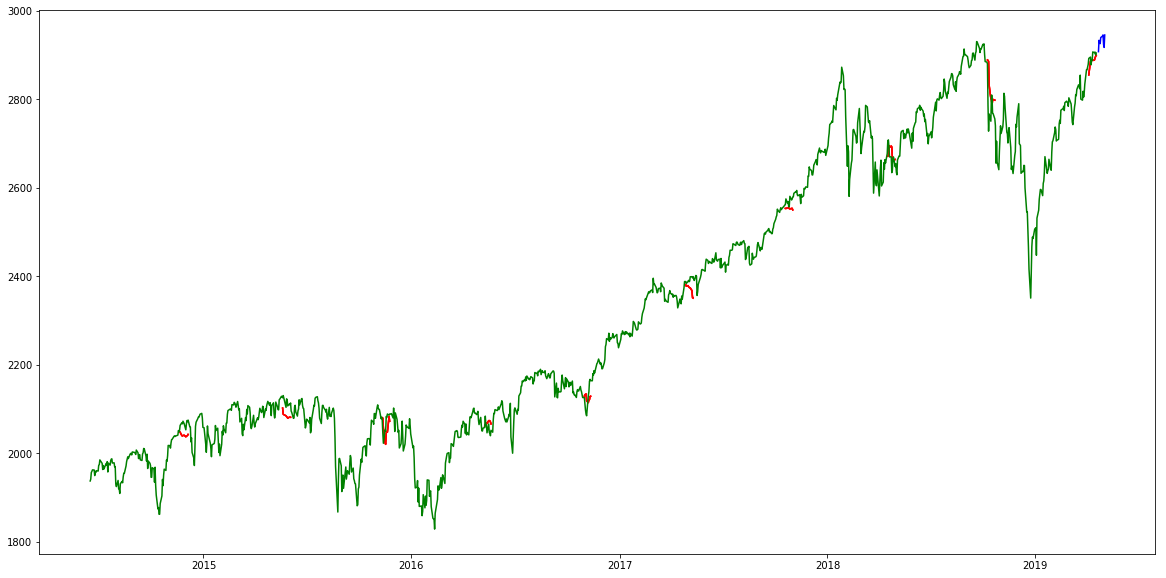

600 1.0876294273114293


In [30]:
best_n_estimators, min_mape = n_estimators_tuning(600, 701, 50, min_mape)
print(best_n_estimators, min_mape)

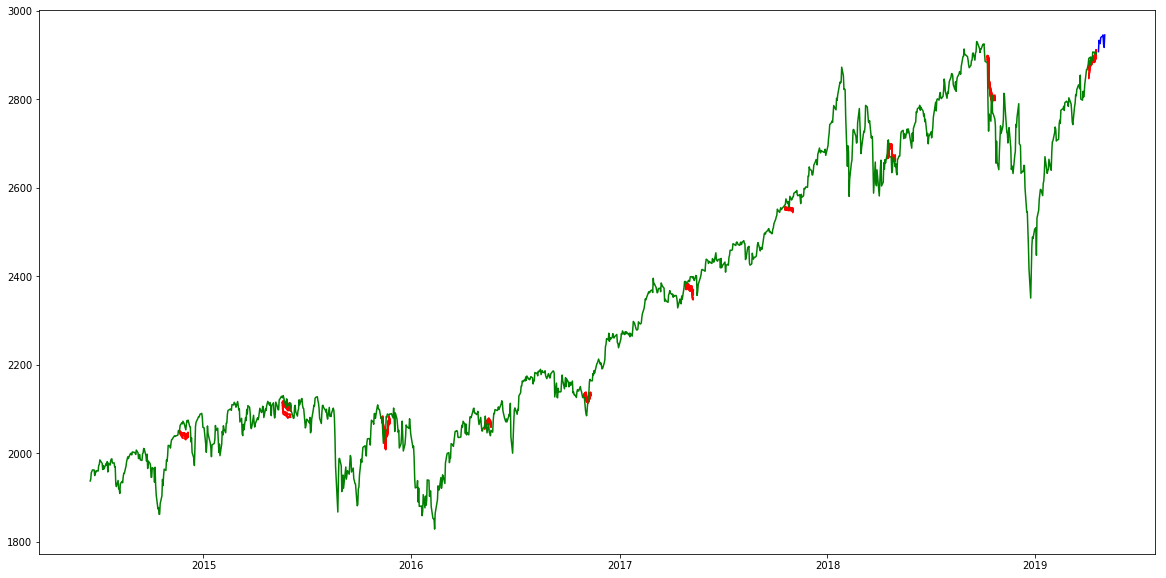

11 3 0.945055542693561


In [31]:
best_max_depth, best_min_child_weight, min_mape = depth_weight_tuning(3,12,2,1,10,2,min_mape)
print(best_max_depth, best_min_child_weight, min_mape)

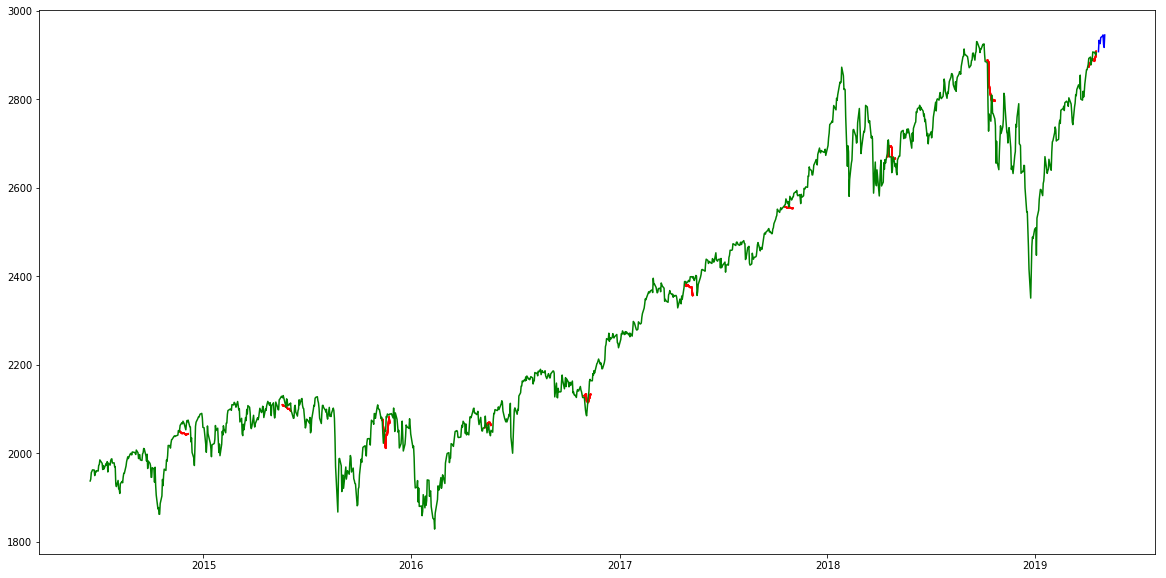

0 0.945055542693561


In [32]:
best_gamma, min_mape = gamma_tuning(0,8, min_mape)
print(best_gamma, min_mape)

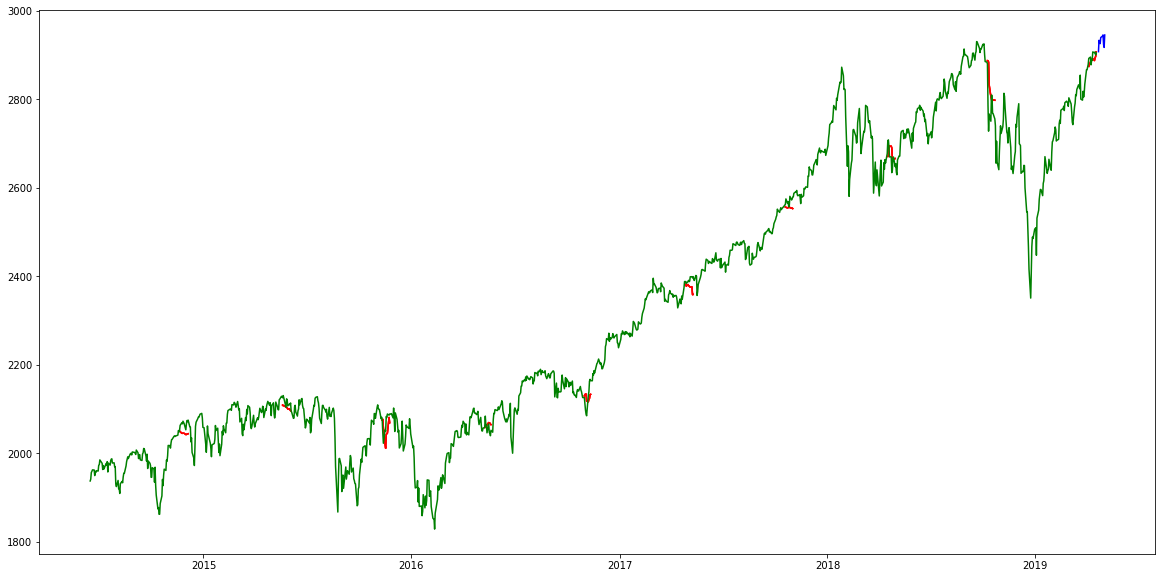

In [33]:
# Re-tune n_estimators
best_n_estimators, min_mape = n_estimators_tuning(550, 651, 50, min_mape)

In [34]:
print(best_n_estimators, min_mape)

550 0.9429836618400046


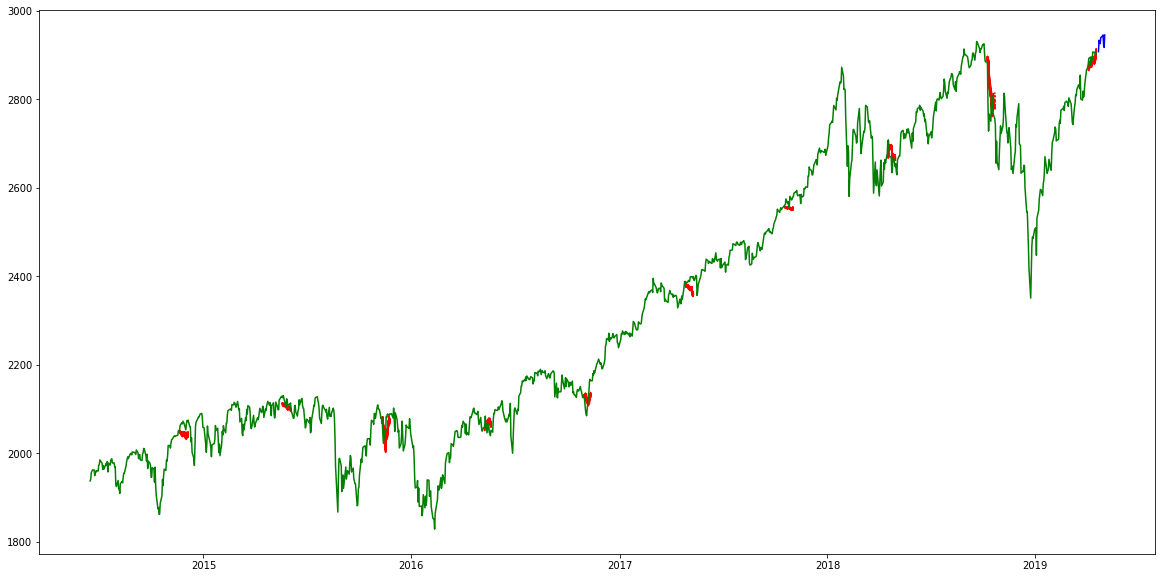

0.9300137167377791


In [35]:
best_subsample, best_colsample_bytree, min_mape = subsample_colsample_tuning(50,100,10,50,100,10,min_mape)
print(min_mape)

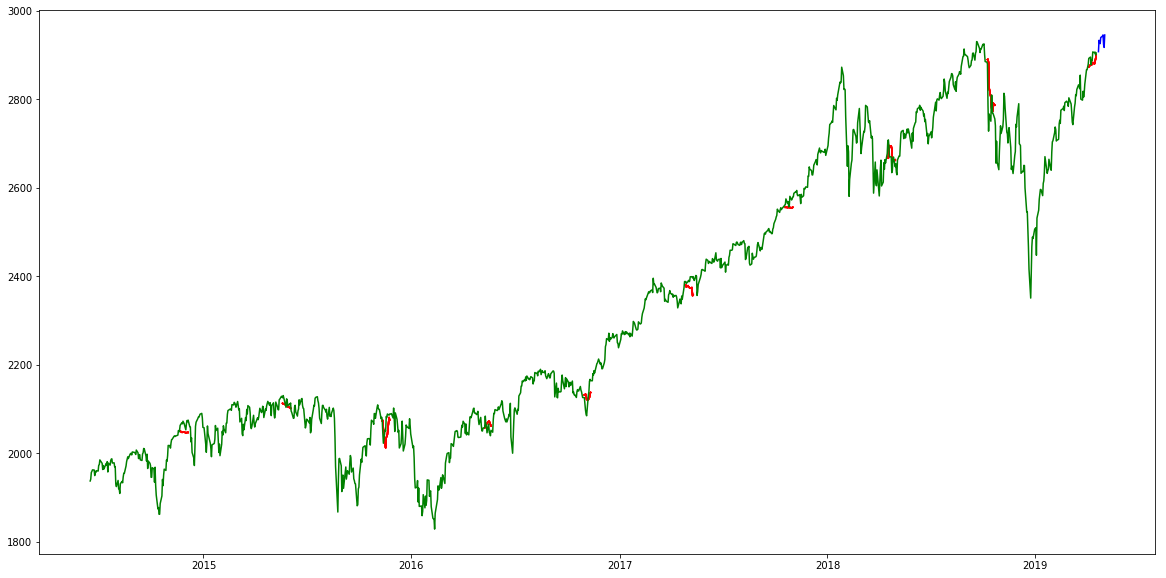

500 0.9296525290395794


In [36]:
# Re-tune n_estimators
best_n_estimators, min_mape = n_estimators_tuning(400, 701, 50, min_mape)
print(best_n_estimators, min_mape)


=== Train Error ===
0.11340868793949782

=== Test Error ===
0.7322787892635965


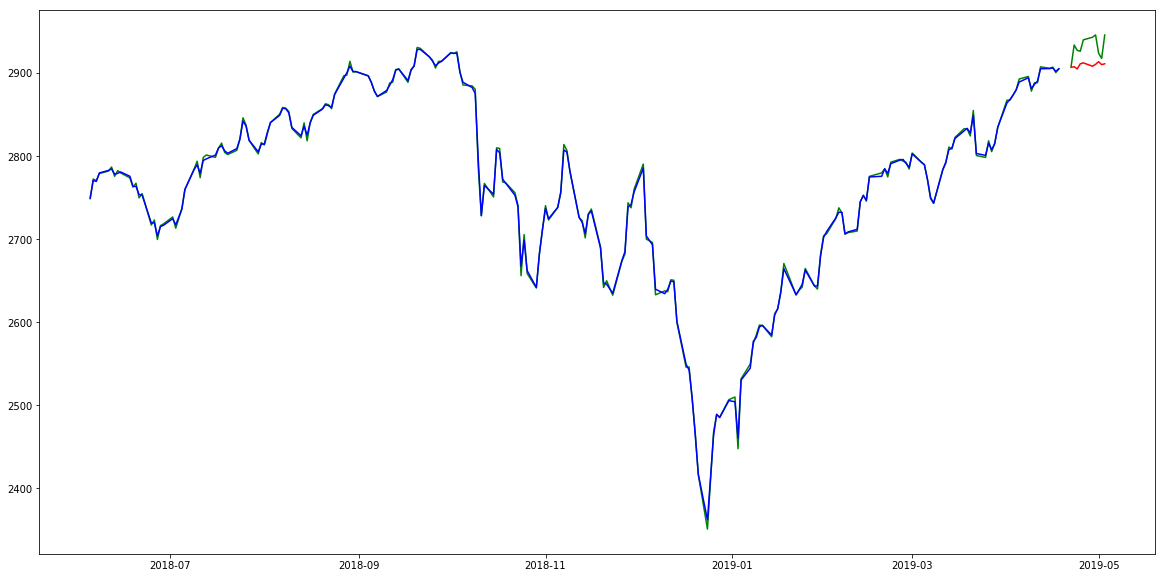

In [37]:
reg = xgb.XGBRegressor(max_depth = best_max_depth, min_child_weight = best_min_child_weight, gamma = best_gamma, 
                       subsample=best_subsample, colsample_bytree = best_colsample_bytree, 
                       learning_rate = 0.025, n_estimators = best_n_estimators) #best_n_estimators)

# Fit model to training data
reg.fit(x_train_xgb, y_train_xgb,
       verbose=False) # Change verbose to True if you want to see it train

# Predict target variables in train & test set
#df_xgb_train['Predicted Price'][29:] = reg.predict(x_train_xgb)
predicted_train = reg.predict(x_train_xgb)
predicted_test = reg.predict(x_test_xgb)

print('')
print('=== Train Error ===')
print(mean_absolute_percentage_error(y_true=y_train_xgb,
                   y_pred=predicted_train))
print('')
print('=== Test Error ===')
print(mean_absolute_percentage_error(y_true=y_test_xgb,
                   y_pred=predicted_test))


plt.figure(figsize=(20,10))

plt.plot(df_xgb_train['Date'][1029:], df_xgb_train['Adj Close'][1029:], c = 'green')
plt.plot(df_xgb_test['Date'], df_xgb_test['Adj Close'], c = 'green')
plt.plot(df_xgb_train['Date'][1029:train_end], predicted_train[1000:], c = 'blue')
plt.plot(df_xgb_test['Date'], predicted_test, c = 'red')


plt.show()